AIM #1: Loading the dataset and printing basic information 
1. Import the Titanic dataset using pandas
2. Create a Dataframe from the dataset
3. Print the first 10 rows of the dataset
4. Print the last 20 rows of the dataset
5. Print dataset's information
6. Describe the dataset
7. Make sure all the information returned by the different functions are displayed in a single table and not on multiple ines

In [7]:
import pandas as pd

file_path = 'titanic.csv'  
df = pd.read_csv(file_path)




first_10_rows = df.head(10)


last_20_rows = df.tail(20)


print("Dataset Information:")
df.info()


description = df.describe(include='all') 


summary_info = pd.DataFrame({
    'Info': ['Number of Rows', 'Number of Columns', 'Data Types', 'Memory Usage'],
    'Values': [
        df.shape[0],
        df.shape[1],
        df.dtypes.to_string(),
        f'{df.memory_usage(deep=True).sum()} bytes'
    ]
})


print("\nFirst 10 Rows:\n", first_10_rows.to_string(index=False))
print("\nLast 20 Rows:\n", last_20_rows.to_string(index=False))
print("\nDescriptive Statistics:\n", description.to_string())
print("\nSummary Info:\n", summary_info.to_string(index=False))


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 83.7+ KB

First 10 Rows:
  PassengerId Survived  Pclass                                                Name    Sex  Age  SibSp  Parch           Ticket    Fare Cabin Embarked
           1        0       3                             

AIM #2: Finding issues (empty, NAs, incorrect value, incorrect format, outliers, etc.) 
1. Find out how many missing values there are in the dataset
2. For the 'Age' column, find the best way to handle the missing values
    2.1. Use an appropriate plot to study the nature of the 'Age' column
    2.2. Figure out what is the best way to calculate the central tendency of the 'Age' column based on the above plot
    2.3. Using the most suitable central tendency measure, fill the missing values in the age column
3. Decide what is the best way to handle the missing values in the 'Cabin' columns
4. Similarly, decide what is the best way to handle the missing values in the 'Embarked' columns
5. Handle the incorrect data under the 'Survived' columns using appropriate measure
6. Handle the incorrectly formatted data under the 'Fare' column


d:\Programming_Software\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


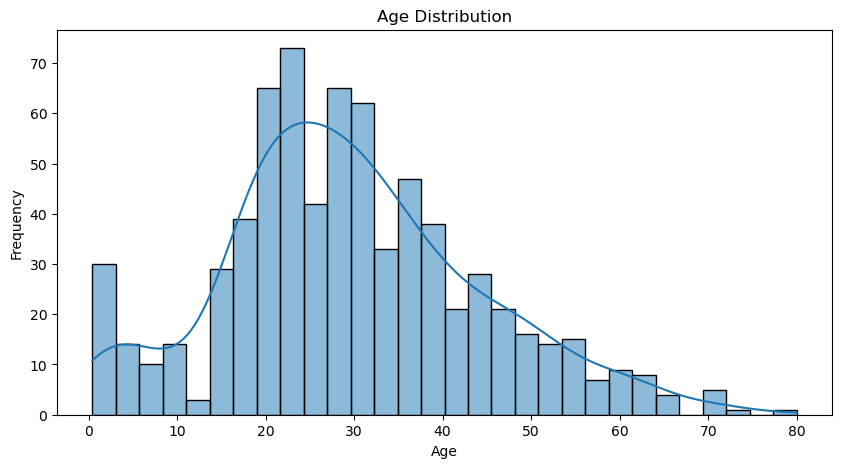

Missing values after handling:
 PassengerId      0
Survived       891
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             7
Cabin            0
Embarked         0
dtype: int64


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'titanic.csv'
df = pd.read_csv(file_path)


missing_values = df.isnull().sum()


plt.figure(figsize=(10, 5))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


median_age = df['Age'].median()


df['Age'].fillna(median_age, inplace=True)


df['Cabin'].fillna('Unknown', inplace=True)



most_frequent_embarked = df['Embarked'].mode()[0]
df['Embarked'].fillna(most_frequent_embarked, inplace=True)


df['Survived'] = df['Survived'].apply(lambda x: x if x in [0, 1] else pd.NA)


df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')


print("Missing values after handling:\n", df.isnull().sum())


AIM #3: Grouping 
1. Find out the average fare grouped by Pclass
    1.1. Plot the above using a suitable plot
2. Find out the average fare grouped by Sex
    2.1. Plot the above using a suitable plot

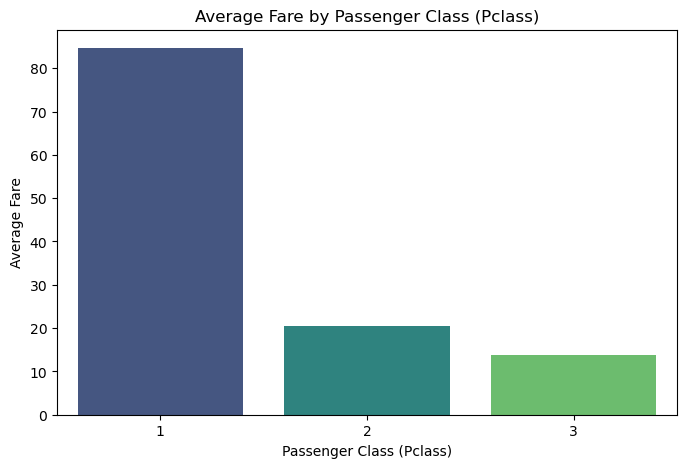

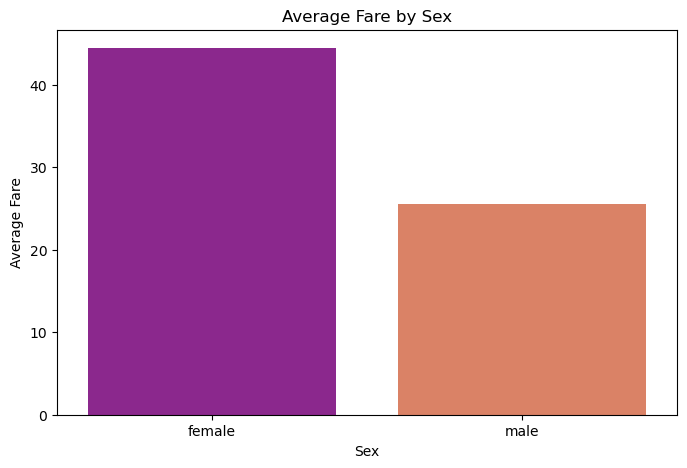

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


file_path = 'titanic.csv'
df = pd.read_csv(file_path)


df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')


average_fare_pclass = df.groupby('Pclass')['Fare'].mean().reset_index()


plt.figure(figsize=(8, 5))
sns.barplot(data=average_fare_pclass, x='Pclass', y='Fare', palette='viridis')
plt.title('Average Fare by Passenger Class (Pclass)')
plt.xlabel('Passenger Class (Pclass)')
plt.ylabel('Average Fare')
plt.show()


average_fare_sex = df.groupby('Sex')['Fare'].mean().reset_index()


plt.figure(figsize=(8, 5))
sns.barplot(data=average_fare_sex, x='Sex', y='Fare', palette='plasma')
plt.title('Average Fare by Sex')
plt.xlabel('Sex')
plt.ylabel('Average Fare')
plt.show()



AIM #4: Dataset visualization using pandas

1. Plot the distribution of 'Age' using a suitable plot
2. Plot the distribution of 'Fare' using a suitable plot
3. Plot the distribution of 'Pclass' using a suitable plot
4. Plot the distribution of 'Survived' using a suitable plot
5. Plot the distribution of 'Embarked' using a suitable plot
6. Plot the distribution of 'Fare' grouped by 'Survived'
7. Plot the distribution of 'Fare' grouped by 'Pclass'
8. Plot the distribution of 'Age' grouped by 'Survived'
9. Plot the distribution of 'Age' grouped by 'PClass'
10. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Survived'
11. Combine the 'SibSp' and 'Parch' and plot its distribution grouped by 'Pclass'
12. Plot a distribution between 'Age' and 'Fare' to see if there's any relationship
13. Are there any other possibilities to show relationships?

d:\Programming_Software\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


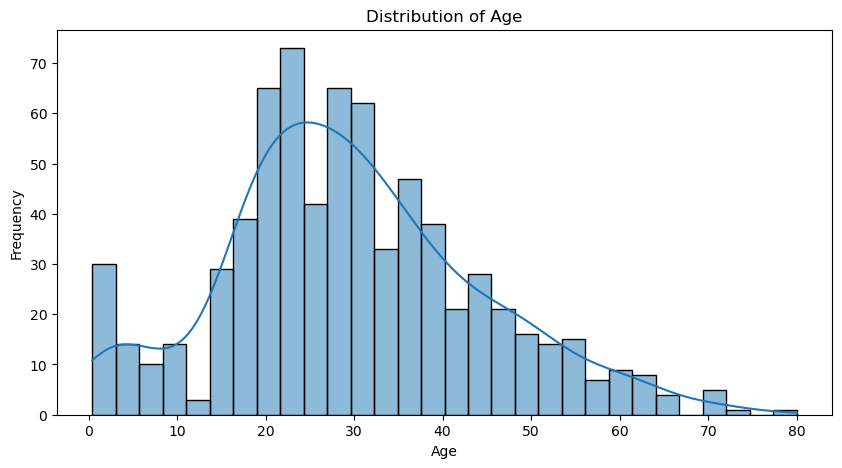

d:\Programming_Software\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


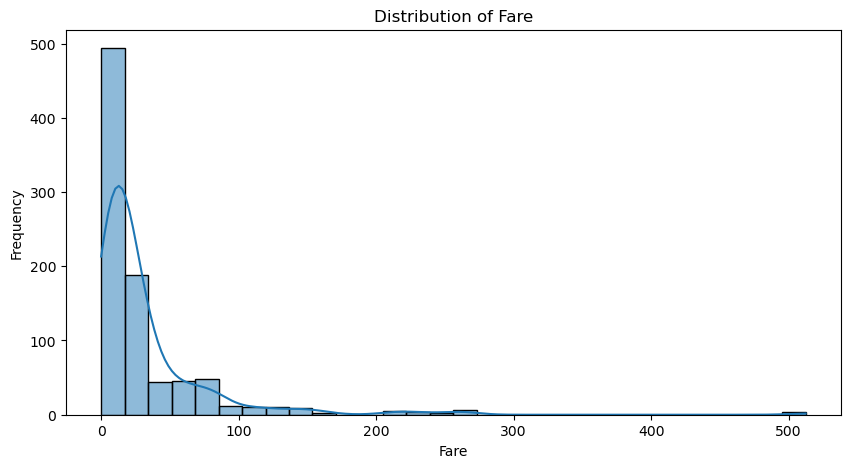

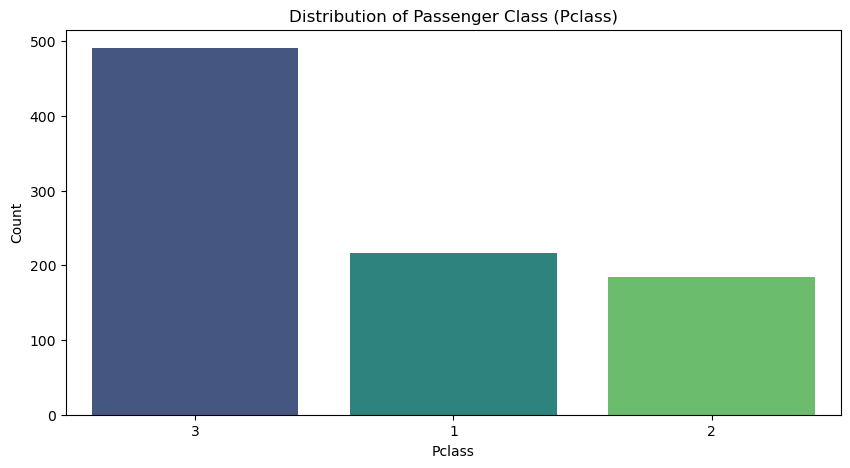

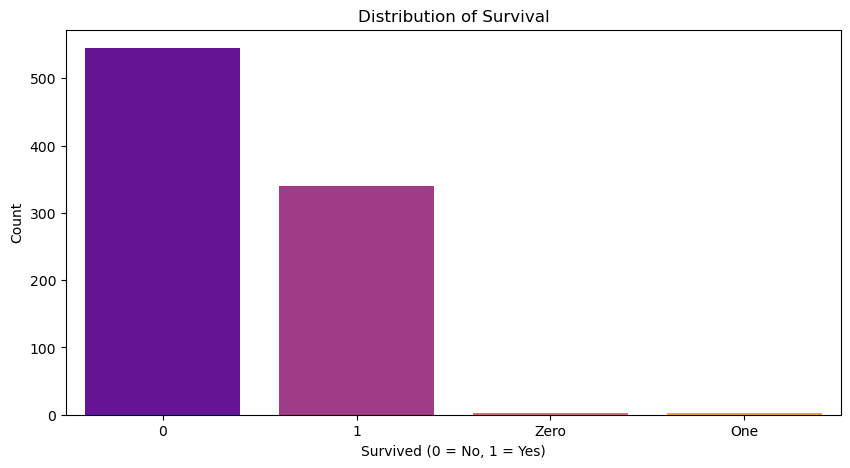

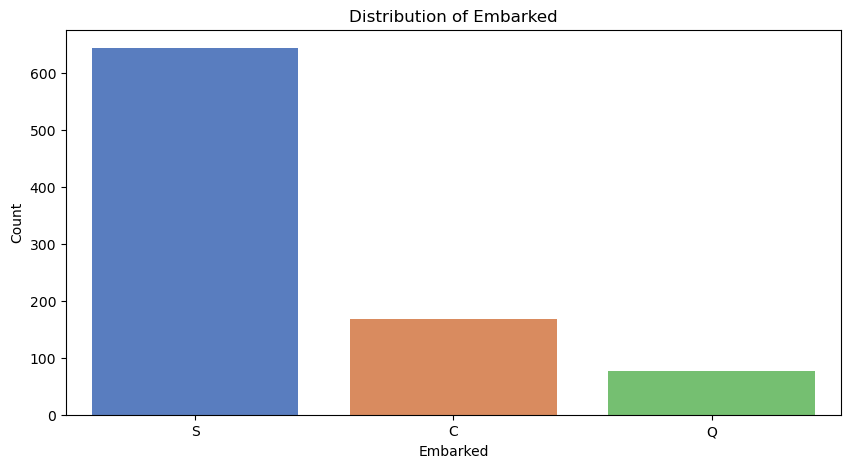

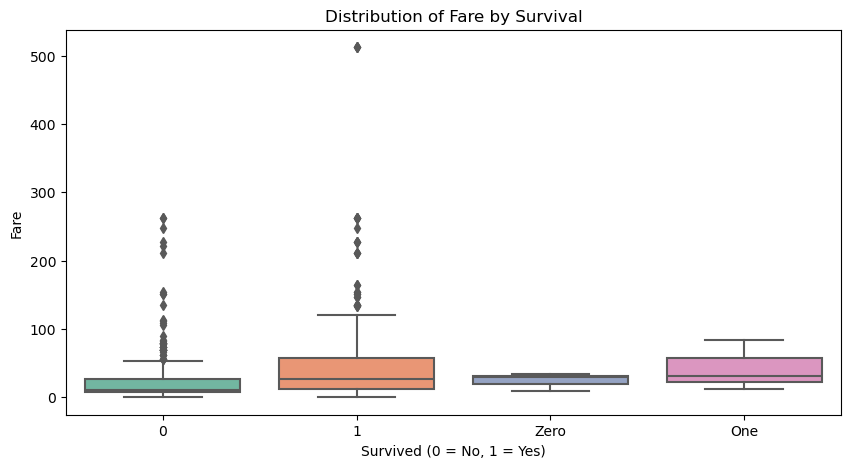

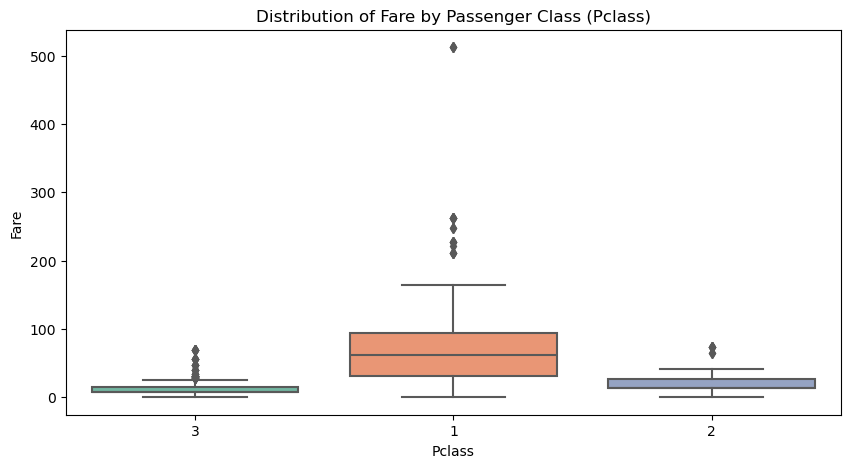

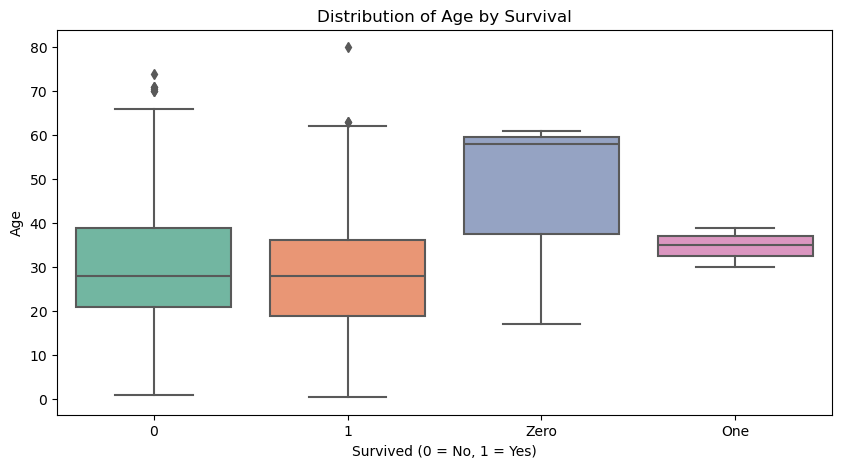

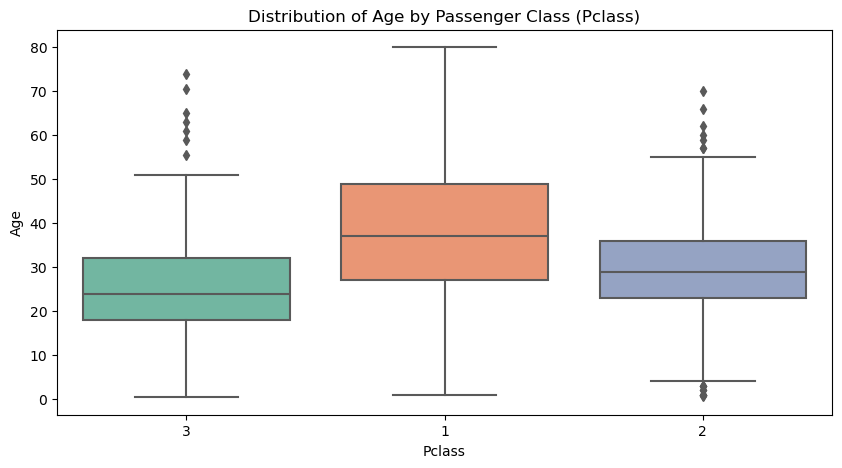

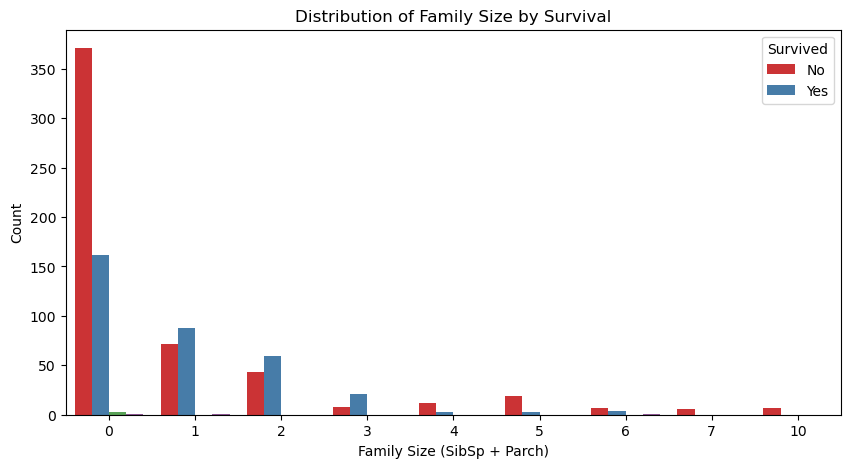

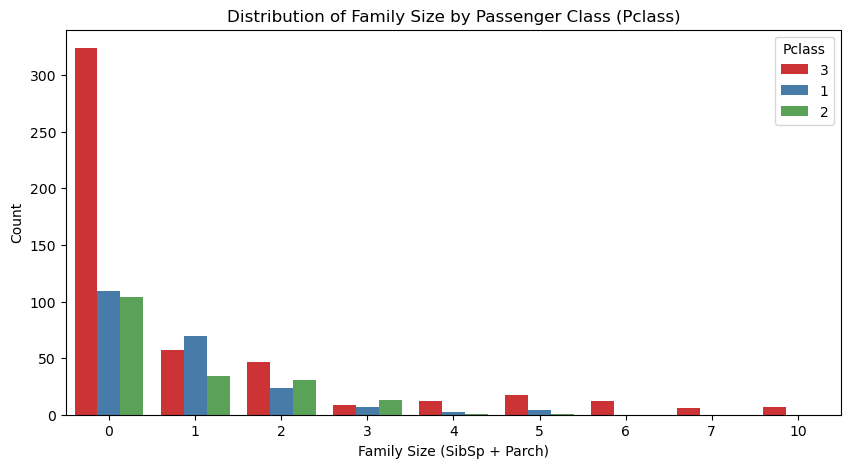

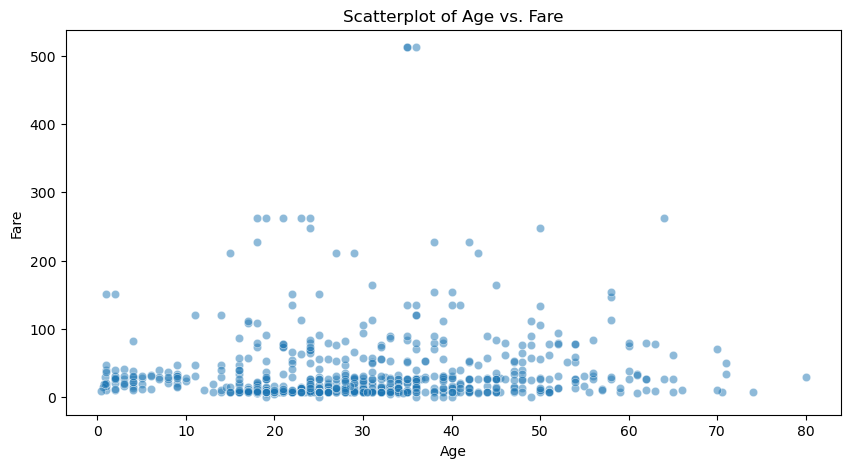

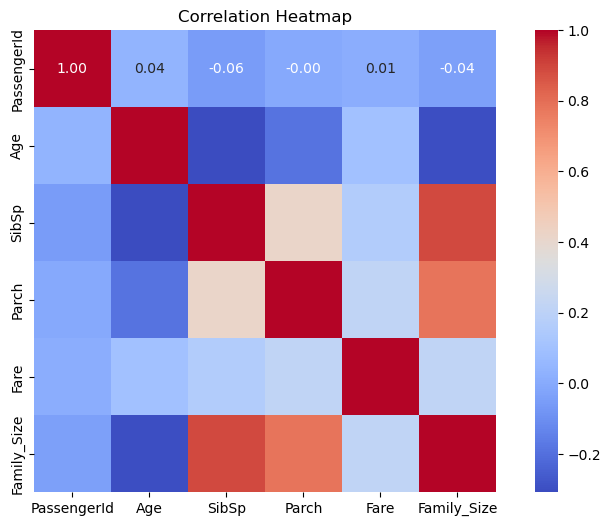

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
file_path = 'titanic.csv'
df = pd.read_csv(file_path)

# Ensure 'Fare' is numeric
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')

# Combine 'SibSp' and 'Parch' into 'Family_Size'
df['Family_Size'] = df['SibSp'] + df['Parch']

# Convert 'Pclass' to string for plotting
df['Pclass'] = df['Pclass'].astype(str)

# 1. Plot the distribution of 'Age'
plt.figure(figsize=(10, 5))
sns.histplot(df['Age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 2. Plot the distribution of 'Fare'
plt.figure(figsize=(10, 5))
sns.histplot(df['Fare'].dropna(), bins=30, kde=True)
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# 3. Plot the distribution of 'Pclass'
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Pclass', palette='viridis')
plt.title('Distribution of Passenger Class (Pclass)')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

# 4. Plot the distribution of 'Survived'
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Survived', palette='plasma')
plt.title('Distribution of Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# 5. Plot the distribution of 'Embarked'
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Embarked', palette='muted')
plt.title('Distribution of Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

# 6. Plot the distribution of 'Fare' grouped by 'Survived'
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Survived', y='Fare', palette='Set2')
plt.title('Distribution of Fare by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.show()

# 7. Plot the distribution of 'Fare' grouped by 'Pclass'
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Pclass', y='Fare', palette='Set2')
plt.title('Distribution of Fare by Passenger Class (Pclass)')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

# 8. Plot the distribution of 'Age' grouped by 'Survived'
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Survived', y='Age', palette='Set2')
plt.title('Distribution of Age by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

# 9. Plot the distribution of 'Age' grouped by 'Pclass'
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Pclass', y='Age', palette='Set2')
plt.title('Distribution of Age by Passenger Class (Pclass)')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

# 10. Plot the distribution of 'Family_Size' grouped by 'Survived'
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Family_Size', hue='Survived', palette='Set1')
plt.title('Distribution of Family Size by Survival')
plt.xlabel('Family Size (SibSp + Parch)')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

# 11. Plot the distribution of 'Family_Size' grouped by 'Pclass'
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Family_Size', hue='Pclass', palette='Set1')
plt.title('Distribution of Family Size by Passenger Class (Pclass)')
plt.xlabel('Family Size (SibSp + Parch)')
plt.ylabel('Count')
plt.legend(title='Pclass')
plt.show()

# 12. Plot a distribution between 'Age' and 'Fare'
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='Age', y='Fare', alpha=0.5)
plt.title('Scatterplot of Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# 13. Other possibilities to show relationships - Correlation heatmap
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()



AIM #5: Correlation

1. Generate a correlation matrix for the entire dataset
2. Find correlation between 'Age' and 'Fare'
3. What other possible correlations can be found in the dataset?

Correlation Matrix:
              PassengerId       Age     SibSp     Parch      Fare  Family_Size
PassengerId     1.000000  0.036847 -0.057527 -0.001652  0.013500    -0.040143
Age             0.036847  1.000000 -0.308247 -0.189119  0.096511    -0.301914
SibSp          -0.057527 -0.308247  1.000000  0.414838  0.159746     0.890712
Parch          -0.001652 -0.189119  0.414838  1.000000  0.216417     0.783111
Fare            0.013500  0.096511  0.159746  0.216417  1.000000     0.217425
Family_Size    -0.040143 -0.301914  0.890712  0.783111  0.217425     1.000000

Correlation between 'Age' and 'Fare': 0.09651129963357943

Other possible correlations in the dataset:
              PassengerId       Age     SibSp     Parch      Fare  Family_Size
PassengerId     1.000000  0.036847 -0.057527 -0.001652  0.013500    -0.040143
Age             0.036847  1.000000 -0.308247 -0.189119  0.096511    -0.301914
SibSp          -0.057527 -0.308247  1.000000  0.414838  0.159746     0.890712
Parch          -

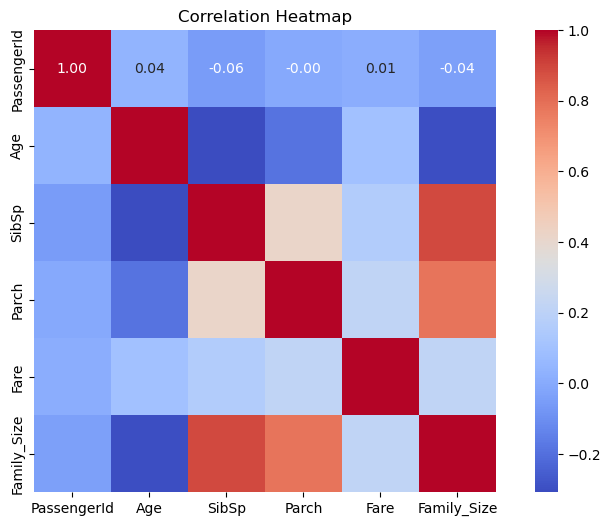

In [15]:
# 1. Generate a correlation matrix for the numeric columns in the dataset
numeric_df = df.select_dtypes(include=['number'])  # 只选择数值列
correlation_matrix = numeric_df.corr()
print("Correlation Matrix:\n", correlation_matrix)

# 2. Find correlation between 'Age' and 'Fare'
age_fare_correlation = correlation_matrix.loc['Age', 'Fare']
print("\nCorrelation between 'Age' and 'Fare':", age_fare_correlation)

# 3. Other possible correlations in the dataset
# Display the entire correlation matrix
print("\nOther possible correlations in the dataset:\n", correlation_matrix)

# Optional: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()
